In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/netflix_movies (1).csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
data.shape

(8807, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
data.shape[0]

8807

In [10]:
data.shape[1]

12

In [11]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Find out which types of genre has most movies and TV Shows?

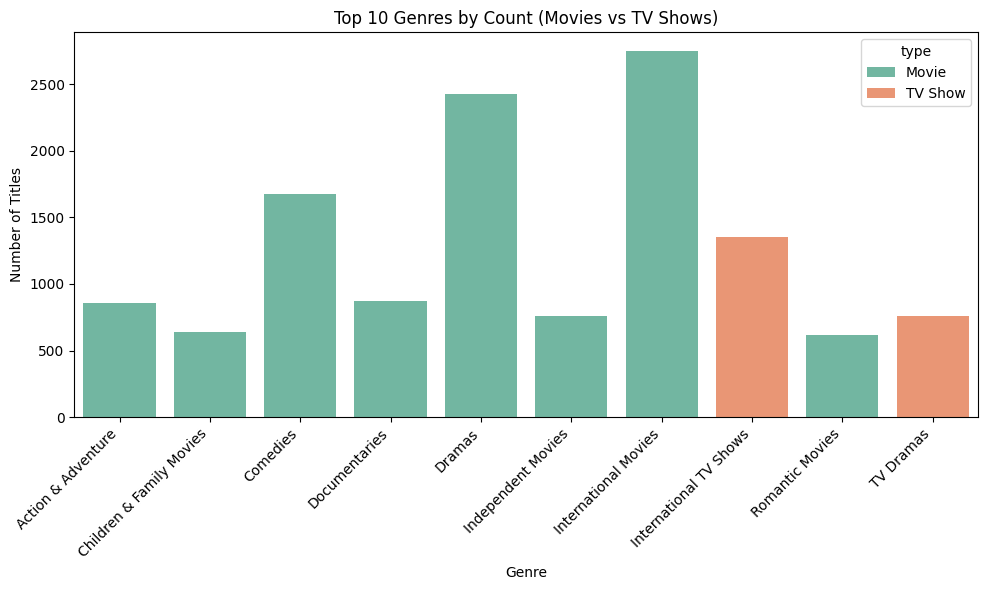

In [13]:
# 1️⃣ Make a copy for genre work
genre_data = data.dropna(subset=['listed_in']).copy()

# 2️⃣ Clean and explode genres
genre_data['listed_in'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('listed_in')

# 3️⃣ Count genres by type
genre_counts = (
    genre_data
      .groupby(['listed_in', 'type'])
      .size()
      .reset_index(name='count')
)

# 4️⃣ Identify Top 10 genres overall
top_genres = (
    genre_counts
      .groupby('listed_in')['count']
      .sum()
      .nlargest(10)
      .index
)

# 5️⃣ Filter down to those top‐10
top_genre_counts = genre_counts[genre_counts['listed_in'].isin(top_genres)]

# 6️⃣ Plot (Movies vs. TV Shows)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genre_counts,
    x='listed_in', y='count', hue='type', palette='Set2'
)
plt.title("Top 10 Genres by Count (Movies vs TV Shows)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

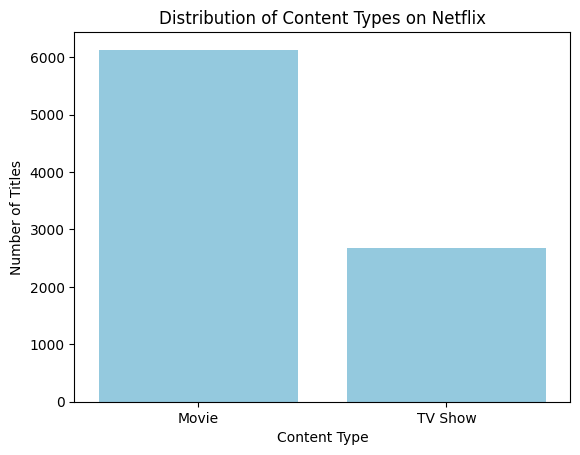

In [16]:
sns.countplot(x='type', data=data, color='skyblue')  # simpler and future-proof
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

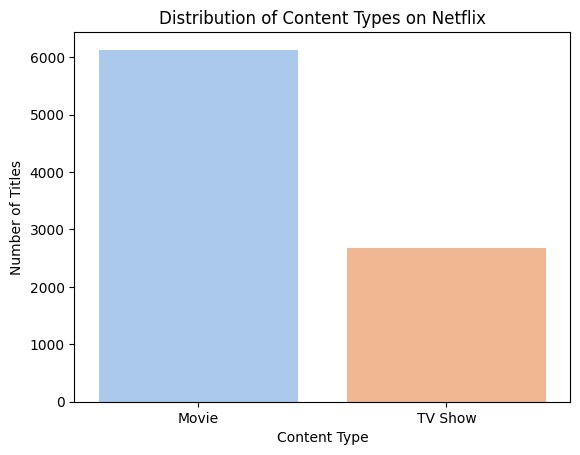

In [17]:
sns.countplot(data=data, x='type', hue='type', palette='pastel', legend=False)
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

In [19]:
# Which countries contribute the most to the content library?

/tmp/ipython-input-21-2784525624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts.head(10), x='country', y='count', palette='viridis')


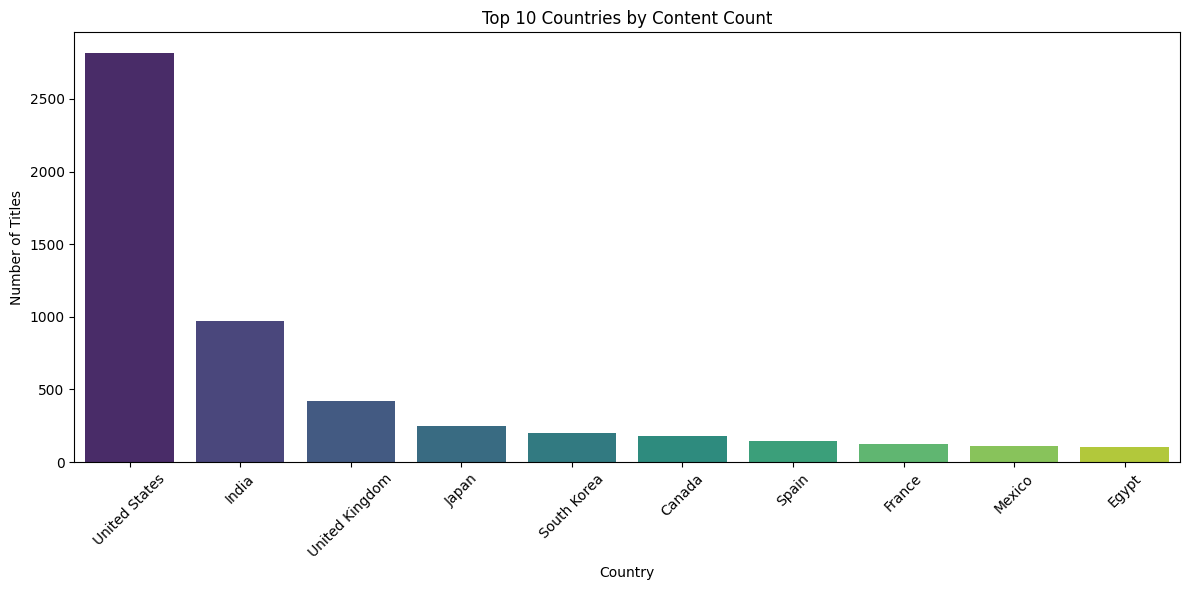

In [21]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=country_counts.head(10), x='country', y='count', palette='viridis')

plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# What is the average duration of movies, and how does it vary across different ratings?

In [26]:
data['duration'] = data['duration'].astype(str).str.extract('(\d+)')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

/tmp/ipython-input-29-2792160595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='pastel')


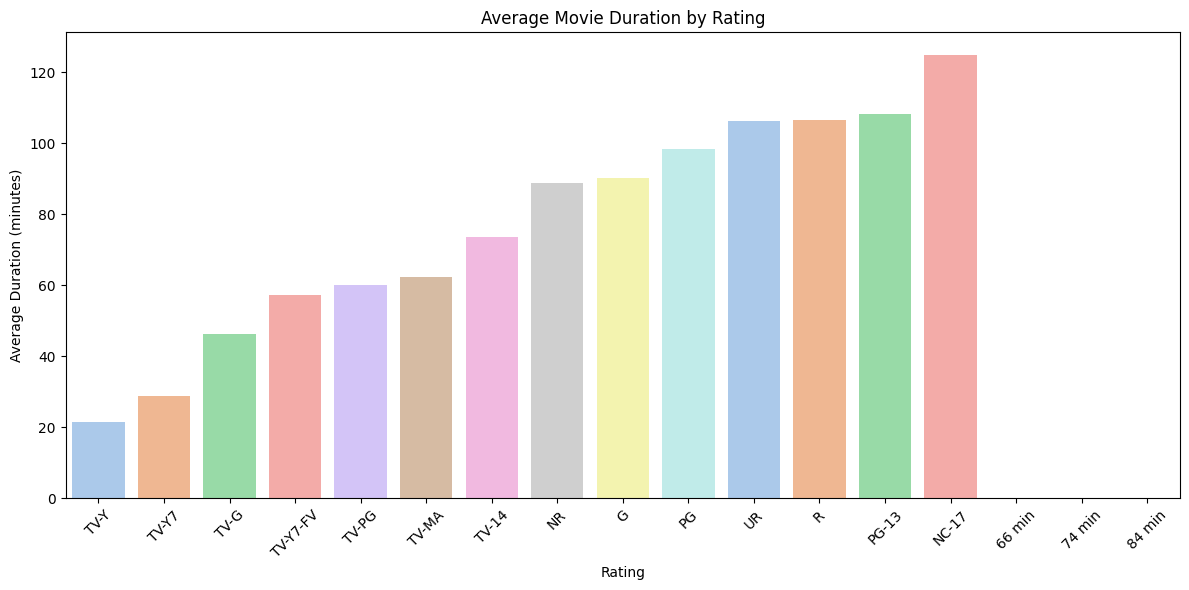

In [29]:
avg_duration = data.groupby('rating')['duration'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='pastel')
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# What are the most common ratings, and how are they distributed across different types of content?

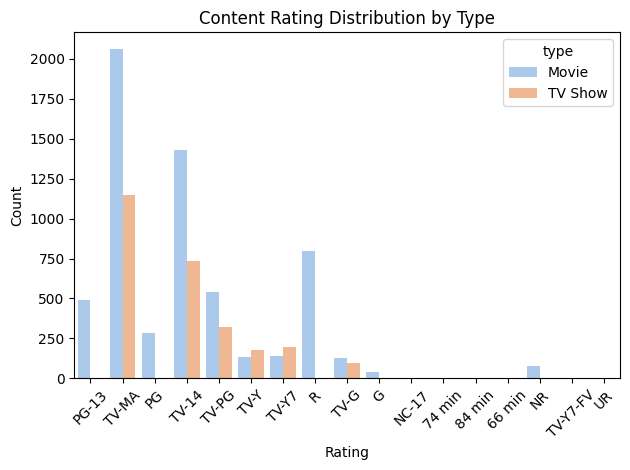

In [32]:
sns.countplot(data=data, x='rating', hue='type', palette='pastel')

plt.title('Content Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()